In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_pack = pd.read_csv('CE290_battery_sim_data.csv', index_col=0)
df_pack

,voltage,current,capacity,SOC,power
0,368.634453,24.0,193.209322,0.901098,8847.226880
1,368.456103,24.0,192.809322,0.899233,8842.946477
2,368.353706,24.0,192.409322,0.897367,8840.488946
3,368.259974,24.0,192.009322,0.895502,8838.239371
4,368.168896,24.0,191.609322,0.893636,8836.053506
...,...,...,...,...,...
251015,259.287428,0.0,0.108104,0.000504,0.000000
251016,259.287428,0.0,0.108104,0.000504,0.000000
251017,259.287428,0.0,0.108104,0.000504,0.000000
251018,259.287428,0.0,0.108104,0.000504,0.000000


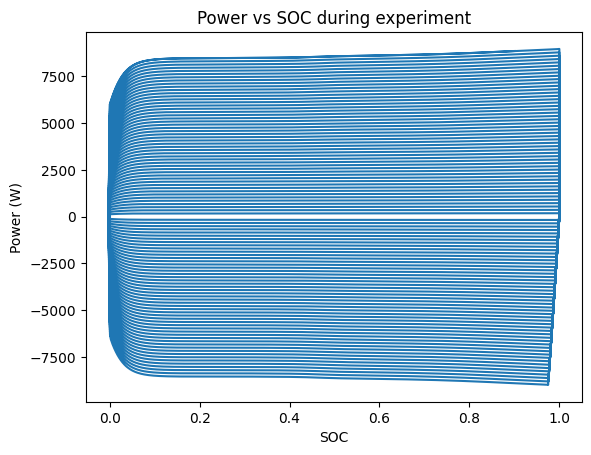

In [3]:
fig, ax = plt.subplots()
ax.plot(df_pack['SOC'], df_pack['power'])
ax.set_title("Power vs SOC during experiment")
ax.set_xlabel("SOC")
ax.set_ylabel("Power (W)")
plt.show()

In [4]:
# drop the first discharge session

df_pack_update = df_pack.drop(np.arange(df_pack.index[0], df_pack.index[df_pack['power'] < 0][0]))
df_pack_update

,voltage,current,capacity,SOC,power
516,259.348316,-0.48,8.171241e-14,3.810940e-16,-124.487192
517,259.576177,-0.48,8.000000e-03,3.731075e-05,-124.596565
518,259.707414,-0.48,1.600000e-02,7.462150e-05,-124.659559
519,259.827797,-0.48,2.400000e-02,1.119323e-04,-124.717343
520,259.944606,-0.48,3.200000e-02,1.492430e-04,-124.773411
...,...,...,...,...,...
251015,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251016,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251017,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251018,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000


## Discharge
#### Prepare dataset

In [5]:
# df with only positive power

df_dis_charge_orig = df_pack_update[df_pack_update['power'] > 0].drop(columns=['capacity', 'power'])
df_dis_charge = df_dis_charge_orig.drop(df_dis_charge_orig.index[df_dis_charge_orig['SOC'] < 0])
df_dis_charge

,voltage,current,SOC
27426,374.377025,0.48,0.999979
27427,374.371535,0.48,0.999942
27428,374.368579,0.48,0.999904
27429,374.365948,0.48,0.999867
27430,374.363447,0.48,0.999830
...,...,...,...
250984,267.018272,24.00,0.006147
250985,261.526960,24.00,0.004281
250986,255.771870,24.00,0.002416
250987,249.753250,24.00,0.000550


In [6]:
df_dis_charge.to_csv('CE290_battery_sim_discharge.csv') 

#### Visualize the dataset

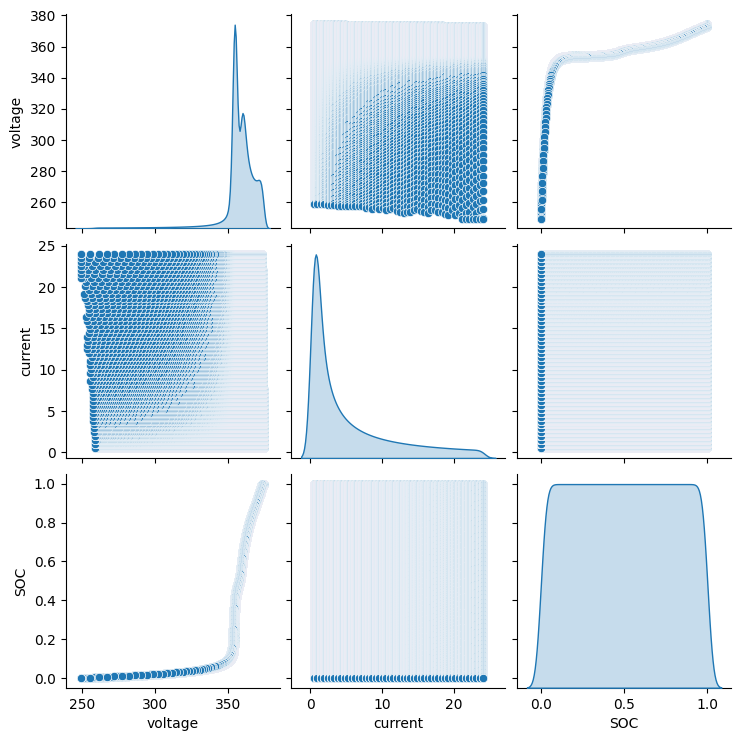

In [7]:
import seaborn as sns

sns.pairplot(df_dis_charge,diag_kind='kde')

In [8]:
# prepare for the second trial
df_dis_charge['SS'] = df_dis_charge['SOC'] * df_dis_charge['SOC']
df_dis_charge['Si'] = df_dis_charge['SOC'] * df_dis_charge['current']
df_dis_charge['ii'] = df_dis_charge['current'] * df_dis_charge['current']

df_dis_charge['SSS'] = df_dis_charge['SOC'] * df_dis_charge['SOC'] * df_dis_charge['SOC']
df_dis_charge['SSi'] = df_dis_charge['SOC'] * df_dis_charge['SOC'] * df_dis_charge['current']
df_dis_charge['Sii'] = df_dis_charge['SOC'] * df_dis_charge['current'] * df_dis_charge['current']
df_dis_charge['iii'] = df_dis_charge['current'] * df_dis_charge['current'] * df_dis_charge['current']

df_dis_charge['log_SOC'] = np.log(df_dis_charge['SOC'])

#### Normalize the discharge dataframe

In [9]:
df_dis_charge.min()

voltage    2.496010e+02
current    4.800000e-01
SOC        7.813997e-06
SS         6.105856e-11
Si         6.459935e-06
ii         2.304000e-01
SSS        4.771114e-16
SSi        8.693908e-11
Sii        3.100769e-06
iii        1.105920e-01
log_SOC   -1.175959e+01
dtype: float64

In [10]:
df_dis_charge.max()

voltage      374.377025
current       24.000000
SOC            1.000479
SS             1.000957
Si            24.011484
ii           576.000000
SSS            1.001436
SSi           24.022974
Sii          576.275620
iii        13824.000000
log_SOC        0.000478
dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_discharge_n = pd.DataFrame(scaler.fit_transform(df_dis_charge), columns=df_dis_charge.columns)
df_discharge_n

,voltage,current,SOC,SS,Si,ii,SSS,SSi,Sii,iii,log_SOC
0,1.000000e+00,0.0,0.999501,9.990016e-01,0.019990,0.0,9.985027e-01,1.998003e-02,0.000400,0.0,0.999958
1,9.999560e-01,0.0,0.999463,9.989270e-01,0.019989,0.0,9.983910e-01,1.997854e-02,0.000400,0.0,0.999954
2,9.999323e-01,0.0,0.999426,9.988525e-01,0.019988,0.0,9.982792e-01,1.997705e-02,0.000400,0.0,0.999951
3,9.999112e-01,0.0,0.999389,9.987779e-01,0.019988,0.0,9.981674e-01,1.997556e-02,0.000400,0.0,0.999948
4,9.998912e-01,0.0,0.999351,9.987034e-01,0.019987,0.0,9.980557e-01,1.997407e-02,0.000400,0.0,0.999945
...,...,...,...,...,...,...,...,...,...,...,...
120620,1.395886e-01,1.0,0.006136,3.774899e-05,0.006144,1.0,2.319311e-07,3.774905e-05,0.006144,1.0,0.566986
120621,9.557922e-02,1.0,0.004272,1.831303e-05,0.004279,1.0,7.836870e-08,1.831309e-05,0.004279,1.0,0.536232
120622,4.945587e-02,1.0,0.002407,5.830884e-06,0.002414,1.0,1.408019e-08,5.830941e-06,0.002415,1.0,0.487574
120623,1.220500e-03,1.0,0.000542,3.025375e-07,0.000550,1.0,1.664558e-10,3.025949e-07,0.000550,1.0,0.361787


#### Split train and test dataset

In [12]:
from sklearn.model_selection import train_test_split

train_dis_charge, test_dis_charge = train_test_split(df_discharge_n, test_size=0.3, random_state=50)

#### Training and Testing model for discharging - 1

In [13]:
# linear regression

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error

x_train_dis_charge = train_dis_charge[['current', 'SOC']]
y_train_dis_charge = train_dis_charge['voltage']
x_test_dis_charge = test_dis_charge[['current', 'SOC']]
y_test_dis_charge = test_dis_charge['voltage']

linear_regression_formula = ("voltage ~ current + SOC")

dis_charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_dis_charge).fit()
# dis_charge_linear_model.rsquared
# dis_charge_linear_model.summary()

y_predict_dis_charge_1 = dis_charge_linear_model.predict(x_test_dis_charge)

linear_model_mse = mean_squared_error(y_test_dis_charge, y_predict_dis_charge_1)
linear_model_mse

0.005864076423605227

In [14]:
dis_charge_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                voltage   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                 4.543e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:36:53   Log-Likelihood:                 96428.
No. Observations:               84437   AIC:                        -1.929e+05
Df Residuals:                   84434   BIC:                        -1.928e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7235      0.001   1262.873      0.000       0.722       0.725
current       -0.0153      0.001    -14.868      0.000      -0.017      -0.013
SOC            0.2772      0.001    301.073      0.000       0.275       0.279
==============================================================================
Omnibus:                    83012.378   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3716507.932
Skew:                          -4.965   Prob(JB):                         0.00
Kurtosis:                      33.948   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

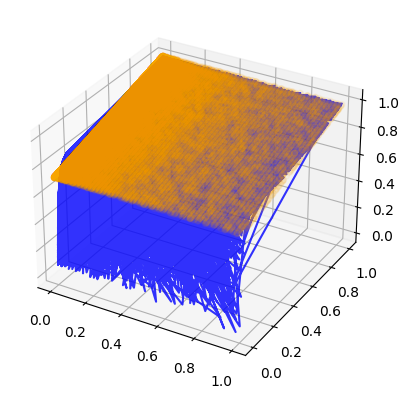

In [15]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
ax.plot(test_dis_charge['current'], test_dis_charge['SOC'], y_test_dis_charge, label='true voltage', alpha=0.8, color = 'blue')
ax.scatter(test_dis_charge['current'], test_dis_charge['SOC'], y_predict_dis_charge_1, label='predict voltage', alpha=0.05, color = 'orange')

#### Training and Testing model for discharging - 2

In [16]:
# linear regression with non-linear terms

x_train_dis_charge = train_dis_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_train_dis_charge = train_dis_charge['voltage']
x_test_dis_charge = test_dis_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_test_dis_charge = test_dis_charge['voltage']

# linear_regression_formula = ("voltage ~ current + SOC + SS + Si + ii + SSS + SSi + Sii + iii + log_SOC")
linear_regression_formula = ("voltage ~ current + SOC + SS + Si + SSS + SSi + log_SOC + 0")

dis_charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_dis_charge).fit()
# dis_charge_linear_model.rsquared
# dis_charge_linear_model.summary()

y_predict_dis_charge_2 = dis_charge_linear_model.predict(x_test_dis_charge)

linear_model_mse = mean_squared_error(y_test_dis_charge, y_predict_dis_charge_2)
linear_model_mse

0.0018630510519090941

In [17]:
mean_absolute_error(y_test_dis_charge, y_predict_dis_charge_2)

0.023778149777551577

In [18]:
max_error(y_test_dis_charge, y_predict_dis_charge_2)

0.31035985803482014

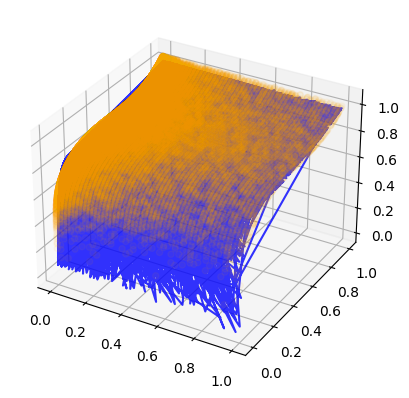

In [19]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
ax.plot(test_dis_charge['current'], test_dis_charge['SOC'], y_test_dis_charge, label='true voltage', alpha=0.8, color = 'blue')
ax.scatter(test_dis_charge['current'], test_dis_charge['SOC'], y_predict_dis_charge_2, label='predict voltage', alpha=0.05, color = 'orange')

In [20]:
dis_charge_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                voltage   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.814e+06
Date:                Sat, 29 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:37:01   Log-Likelihood:                      1.4526e+05
No. Observations:               84437   AIC:                                 -2.905e+05
Df Residuals:                   84430   BIC:                                 -2.904e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
current       -0.0722      0.002    -41.938      0.000      -0.076      -0.069
SOC            0.6192      0.007     93.898      0.000       0.606       0.632
SS            -1.6451      0.014   -121.736      0.000      -1.672      -1.619
Si             0.2412      0.008     29.757      0.000       0.225       0.257
SSS            1.1792      0.008    138.894      0.000       1.163       1.196
SSi           -0.1964      0.008    -25.028      0.000      -0.212      -0.181
log_SOC        0.8818      0.001    852.763      0.000       0.880       0.884
==============================================================================
Omnibus:                    62088.843   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1488687.380
Skew:                          -3.321   Prob(JB):                         0.00
Kurtosis:                      22.468   Cond. No.                         140.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### FNN for discharging - 3

In [21]:
df_dis_charge_orig

,voltage,current,SOC
27426,374.377025,0.48,0.999979
27427,374.371535,0.48,0.999942
27428,374.368579,0.48,0.999904
27429,374.365948,0.48,0.999867
27430,374.363447,0.48,0.999830
...,...,...,...
250984,267.018272,24.00,0.006147
250985,261.526960,24.00,0.004281
250986,255.771870,24.00,0.002416
250987,249.753250,24.00,0.000550


In [22]:
len(df_dis_charge[df_dis_charge['current'] == 23.99999999978])

538

In [23]:
df_dis_charge_orig['current'].nunique()

50

In [24]:
df_dis_charge_orig['current'].unique()

array([ 0.48,  0.96,  1.44,  1.92,  2.4 ,  2.88,  3.36,  3.84,  4.32,
        4.8 ,  5.28,  5.76,  6.24,  6.72,  7.2 ,  7.68,  8.16,  8.64,
        9.12,  9.6 , 10.08, 10.56, 11.04, 11.52, 12.  , 12.48, 12.96,
       13.44, 13.92, 14.4 , 14.88, 15.36, 15.84, 16.32, 16.8 , 17.28,
       17.76, 18.24, 18.72, 19.2 , 19.68, 20.16, 20.64, 21.12, 21.6 ,
       22.08, 22.56, 23.04, 23.52, 24.  ])

In [25]:
# take 501 points of voltage for each current by interpolating 100% SOC evenly

from scipy.interpolate import interp1d

current_array = np.zeros((df_dis_charge_orig['current'].nunique(), 501))
voltage_array = np.zeros((df_dis_charge_orig['current'].nunique(), 501))
SOC_array = np.zeros((df_dis_charge_orig['current'].nunique(), 501))

SOC_new = np.linspace(0.001, 0.999, 501)
current_id = 0

for i in df_dis_charge_orig['current'].unique():
    f_v = interp1d(df_dis_charge_orig[df_dis_charge_orig['current'] == i]['SOC'], df_dis_charge_orig[df_dis_charge_orig['current'] == i]['voltage'])
    v_new = f_v(SOC_new)
    
    voltage_array[current_id,:] = v_new
    current_array[current_id,:] = i
    SOC_array[current_id,:] = SOC_new
    current_id += 1

In [26]:
nn_input = np.ravel(voltage_array[:,:-1])
nn_output = np.ravel(voltage_array[:,1:])

In [27]:
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomNormal, RandomUniform

def purelin(x):
    return x

single_feature_normalizer = tf.keras.layers.Normalization(axis=None)
feature = tf.random.normal((314, 1))
single_feature_normalizer.adapt(feature)

FNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    single_feature_normalizer,
    tf.keras.layers.Dense(1)
])

#add model layers

FNN.add(Dense(1, activation=purelin, kernel_initializer=RandomNormal(stddev=0.01), bias_initializer=RandomNormal(stddev=0.01)))
FNN.add(Dense(20, activation = 'relu'))
FNN.add(Dense(8, activation = 'sigmoid'))
FNN.add(Dense(5, activation = 'relu'))
FNN.add(Dense(1, activation=purelin))
sgd_optimizer = SGD(momentum=0.9)
FNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
historyFNN = FNN.fit(nn_input, nn_output, batch_size=30, epochs=30)

Epoch 1/30
834/834 [==============================] - 4s 2ms/step - loss: 120206.0156 - accuracy: 0.0000e+00
Epoch 2/30
834/834 [==============================] - 2s 3ms/step - loss: 97431.4531 - accuracy: 0.0000e+00
Epoch 3/30
834/834 [==============================] - 2s 3ms/step - loss: 65881.8125 - accuracy: 0.0000e+00
Epoch 4/30
834/834 [==============================] - 2s 3ms/step - loss: 35733.3945 - accuracy: 0.0000e+00
Epoch 5/30
834/834 [==============================] - 2s 3ms/step - loss: 12022.5947 - accuracy: 0.0000e+00
Epoch 6/30
834/834 [==============================] - 2s 3ms/step - loss: 2355.0068 - accuracy: 0.0000e+00
Epoch 7/30
834/834 [==============================] - 2s 3ms/step - loss: 337.9908 - accuracy: 0.0000e+00
Epoch 8/30
834/834 [==============================] - 2s 3ms/step - loss: 185.3433 - accuracy: 0.0000e+00
Epoch 9/30
834/834 [==============================] - 2s 3ms/step - loss: 182.6640 - accuracy: 0.0000e+00
Epoch 10/30
834/834 [=============

In [28]:
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomNormal, RandomUniform

def purelin(x):
    return x

single_feature_normalizer = tf.keras.layers.Normalization(axis=None)
feature = tf.random.normal((314, 1))
single_feature_normalizer.adapt(feature)

FNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    single_feature_normalizer,
    tf.keras.layers.Dense(1)
])

#add model layers

FNN.add(Dense(1, activation=purelin, kernel_initializer=RandomNormal(stddev=0.01), bias_initializer=RandomNormal(stddev=0.01)))
FNN.add(Dense(20, activation = 'relu'))
FNN.add(Dense(8, activation = 'sigmoid'))
FNN.add(Dense(5, activation = 'relu'))
FNN.add(Dense(1, activation=purelin))
sgd_optimizer = SGD(momentum=0.9)
FNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
historyFNN = FNN.fit(nn_input, nn_output, batch_size=30, epochs=30)

Epoch 1/30
834/834 [==============================] - 3s 2ms/step - loss: 121518.7031 - accuracy: 0.0000e+00
Epoch 2/30
834/834 [==============================] - 2s 2ms/step - loss: 87711.7734 - accuracy: 0.0000e+00
Epoch 3/30
834/834 [==============================] - 2s 2ms/step - loss: 45836.0469 - accuracy: 0.0000e+00
Epoch 4/30
834/834 [==============================] - 2s 3ms/step - loss: 15822.0342 - accuracy: 0.0000e+00
Epoch 5/30
834/834 [==============================] - 2s 3ms/step - loss: 2960.8887 - accuracy: 0.0000e+00
Epoch 6/30
834/834 [==============================] - 2s 3ms/step - loss: 354.2576 - accuracy: 0.0000e+00
Epoch 7/30
834/834 [==============================] - 2s 3ms/step - loss: 184.8302 - accuracy: 0.0000e+00
Epoch 8/30
834/834 [==============================] - 2s 3ms/step - loss: 162.3203 - accuracy: 0.0000e+00
Epoch 9/30
834/834 [==============================] - 2s 3ms/step - loss: 127.1612 - accuracy: 0.0000e+00
Epoch 10/30
834/834 [===============

#### one-step prediction

In [29]:
testPredictFNN = FNN.predict(nn_input)

782/782 [==============================] - 2s 2ms/step


In [30]:
testPredictFNN_reshape = testPredictFNN.reshape(voltage_array.shape[0], (voltage_array.shape[1]-1))
testPredictFNN_reshape.shape

(50, 500)

In [31]:
# voltage_array[:,1:]

In [32]:
# testPredictFNN_reshape

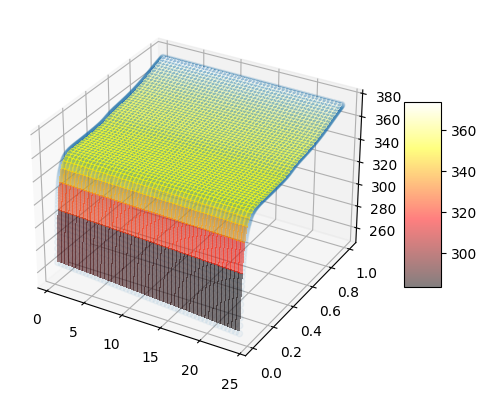

In [33]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(current_array[:,1:], SOC_array[:,1:], testPredictFNN_reshape, alpha=0.05)
surf = ax.plot_surface(current_array[:,1:], SOC_array[:,1:], voltage_array[:,1:], cmap=cm.hot, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### recursive call prediction

In [34]:
#for loop predict
# voltage_array.shape[0] == df_dis_charge_orig['current'].nunique()
testPredictFNN2 = np.zeros((voltage_array.shape[0], voltage_array.shape[1]-1))
v0 = voltage_array[:,0]
for i in range(voltage_array.shape[1]-1):
    y = FNN.predict(v0)
    testPredictFNN2[:,i] = np.squeeze(y[:,:])
    v0 = y


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 5ms/step


In [35]:
testPredictFNN2

array([[266.74130249, 271.56716919, 276.62289429, ..., 341.95114136,
        341.95114136, 341.95114136],
       [266.52267456, 271.33706665, 276.38296509, ..., 341.95114136,
        341.95114136, 341.95114136],
       [266.29769897, 271.10015869, 276.13577271, ..., 341.95114136,
        341.95114136, 341.95114136],
       ...,
       [255.53857422, 259.66928101, 264.07925415, ..., 341.95114136,
        341.95114136, 341.95114136],
       [255.26759338, 259.37921143, 263.77041626, ..., 341.95114136,
        341.95114136, 341.95114136],
       [255.01834106, 259.11227417, 263.48599243, ..., 341.95114136,
        341.95114136, 341.95114136]])

In [36]:
testPredictFNN2_reshape = testPredictFNN2.reshape(voltage_array.shape[0], (voltage_array.shape[1]-1))
testPredictFNN2_reshape.shape

(50, 500)

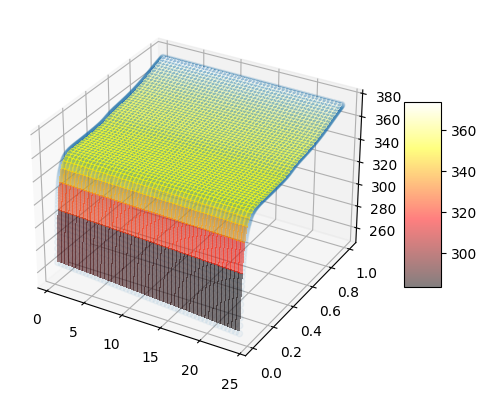

In [37]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(current_array[:,1:], SOC_array[:,1:], testPredictFNN_reshape, alpha=0.05)
surf = ax.plot_surface(current_array[:,1:], SOC_array[:,1:], voltage_array[:,1:], cmap=cm.hot, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Calculation of R2 for discharge

In [38]:
voltage_array_y = voltage_array[:,1:]
voltage_array_y.shape

(50, 500)

In [39]:
voltage_1d_array = voltage_array_y.reshape((voltage_array_y.shape[0]*voltage_array_y.shape[1]))
voltage_1d_array

array([268.12437144, 273.77436563, 279.12725387, ..., 372.77289336,
       372.89311981, 373.05779181])

In [40]:
# one-step

testPredictFNN_1d_array = testPredictFNN_reshape.reshape((voltage_array_y.shape[0]*voltage_array_y.shape[1]))
testPredictFNN_1d_array

array([266.7413 , 273.02097, 278.9185 , ..., 372.34134, 372.43604,
       372.54086], dtype=float32)

In [41]:
1 - (np.square(voltage_1d_array - testPredictFNN_1d_array)).sum() / (np.square(voltage_1d_array - voltage_1d_array.mean())).sum()

0.9990663419024036

In [42]:
# recursive

testPredictFNN2_1d_array = testPredictFNN2.reshape((voltage_array_y.shape[0]*voltage_array_y.shape[1]))
testPredictFNN2_1d_array

array([266.74130249, 271.56716919, 276.62289429, ..., 341.95114136,
       341.95114136, 341.95114136])

In [43]:
1 - (np.square(voltage_1d_array - testPredictFNN2_1d_array)).sum() / (np.square(voltage_1d_array - voltage_1d_array.mean())).sum()

-0.7348759883753617

## Charge
#### Prepare dataset

In [44]:
# df with only negative power

df_charge_orig = df_pack_update[df_pack_update['power'] < 0].drop(columns=['capacity', 'power'])

df_charge = df_charge_orig.copy()
df_charge['current'] = - df_charge_orig['current']

df_charge = df_charge.drop(df_charge.index[df_charge['SOC'] < 0])

df_charge

,voltage,current,SOC
516,259.348316,0.480000,3.810940e-16
517,259.576177,0.480000,3.731075e-05
518,259.707414,0.480000,7.462150e-05
519,259.827797,0.480000,1.119323e-04
520,259.944606,0.480000,1.492430e-04
...,...,...,...
250415,374.400000,0.000652,1.000478e+00
250416,374.400000,0.000597,1.000478e+00
250417,374.400000,0.000547,1.000478e+00
250418,374.400000,0.000501,1.000478e+00


In [45]:
df_charge.to_csv('CE290_battery_sim_charge.csv') 

In [46]:
# fig, ax = plt.subplots()
# ax.plot(df_charge['SOC'], df_charge['voltage'], label='voltage')
# ax.plot(df_charge['SOC'], df_charge['current'], label='current')
# ax.plot(df_charge['SOC'], df_charge['capacity'], label='capacity')
# ax.plot(df_charge['SOC'], df_charge['power'], label='power')
# ax.set_xlabel("SOC")
# ax.legend()
# plt.show()

#### Visualize the dataframe

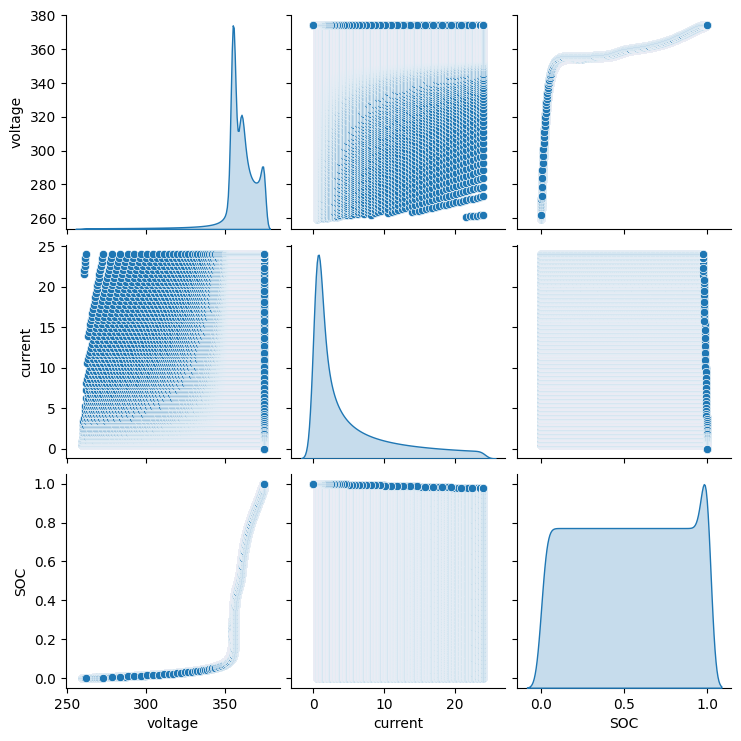

In [47]:
sns.pairplot(df_charge,diag_kind='kde')

In [48]:
# prepare for the second trial
df_charge['SS'] = df_charge['SOC'] * df_charge['SOC']
df_charge['Si'] = df_charge['SOC'] * df_charge['current']
df_charge['ii'] = df_charge['current'] * df_charge['current']

df_charge['SSS'] = df_charge['SOC'] * df_charge['SOC'] * df_charge['SOC']
df_charge['SSi'] = df_charge['SOC'] * df_charge['SOC'] * df_charge['current']
df_charge['Sii'] = df_charge['SOC'] * df_charge['current'] * df_charge['current']
df_charge['iii'] = df_charge['current'] * df_charge['current'] * df_charge['current']

df_charge['log_SOC'] = np.log(df_charge['SOC'])

#### Normalize the dataset

In [49]:
df_charge.min()

voltage    2.593483e+02
current    4.591280e-04
SOC        3.810940e-16
SS         1.452326e-31
Si         1.829251e-16
ii         2.107985e-07
SSS        5.534727e-47
SSi        6.971165e-32
Sii        8.780405e-17
iii        9.678349e-11
log_SOC   -3.550349e+01
dtype: float64

In [50]:
df_charge.max()

voltage      374.400011
current       24.020522
SOC            1.000479
SS             1.000957
Si            23.431340
ii           576.985466
SSS            1.001436
SSi           22.856611
Sii          562.833021
iii        13859.491952
log_SOC        0.000478
dtype: float64

In [51]:
scaler = MinMaxScaler()

df_charge_n = pd.DataFrame(scaler.fit_transform(df_charge), columns=df_charge.columns)
df_charge_n

,voltage,current,SOC,SS,Si,ii,SSS,SSi,Sii,iii,log_SOC
0,0.000000,0.019964,0.000000,0.000000e+00,0.000000e+00,3.993165e-04,0.000000e+00,0.000000e+00,0.000000e+00,7.979513e-06,0.000000
1,0.001981,0.019964,0.000037,1.390761e-09,7.643251e-07,3.993165e-04,5.186552e-14,2.923462e-11,1.527344e-08,7.979513e-06,0.712801
2,0.003121,0.019964,0.000075,5.563044e-09,1.528650e-06,3.993165e-04,4.149241e-13,1.169385e-10,3.054688e-08,7.979513e-06,0.732324
3,0.004168,0.019964,0.000112,1.251685e-08,2.292975e-06,3.993165e-04,1.400369e-12,2.631116e-10,4.582032e-08,7.979513e-06,0.743744
4,0.005183,0.019964,0.000149,2.225217e-08,3.057300e-06,3.993165e-04,3.319393e-12,4.677539e-10,6.109377e-08,7.979513e-06,0.751847
...,...,...,...,...,...,...,...,...,...,...,...
126237,1.000000,0.000008,1.000000,9.999997e-01,2.783111e-05,3.709899e-10,9.999995e-01,2.854457e-05,7.552106e-10,1.299760e-14,1.000000
126238,1.000000,0.000006,1.000000,9.999998e-01,2.550729e-05,2.531594e-10,9.999996e-01,2.616118e-05,6.343596e-10,8.398841e-15,1.000000
126239,1.000000,0.000004,1.000000,9.999998e-01,2.335942e-05,1.533814e-10,9.999998e-01,2.395825e-05,5.320238e-10,4.831082e-15,1.000000
126240,1.000000,0.000002,1.000000,9.999999e-01,2.139165e-05,6.966878e-11,9.999999e-01,2.194004e-05,4.461651e-10,2.089870e-15,1.000000


#### Split train and test dataset

In [52]:
train_charge, test_charge = train_test_split(df_charge_n, test_size=0.3, random_state=50)

#### Training and Testing model for Charging - 1

In [53]:
# linear regression

x_train_charge = train_charge[['current', 'SOC']]
y_train_charge = train_charge['voltage']
x_test_charge = test_charge[['current', 'SOC']]
y_test_charge = test_charge['voltage']

linear_regression_formula = ("voltage ~ current + SOC")

charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_charge).fit()
# charge_linear_model.rsquared
# charge_linear_model.summary()

y_predict_charge_1 = charge_linear_model.predict(x_test_charge)

linear_model_mse = mean_squared_error(y_test_charge, charge_linear_model.predict(x_test_charge))
linear_model_mse

0.006158469129201893

In [54]:
charge_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                voltage   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 5.567e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:40:53   Log-Likelihood:                 99905.
No. Observations:               88369   AIC:                        -1.998e+05
Df Residuals:                   88366   BIC:                        -1.998e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7044      0.001   1207.147      0.000       0.703       0.706
current        0.0139      0.001     13.213      0.000       0.012       0.016
SOC            0.2925      0.001    333.597      0.000       0.291       0.294
==============================================================================
Omnibus:                    88057.232   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4226372.853
Skew:                          -5.048   Prob(JB):                         0.00
Kurtosis:                      35.341   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

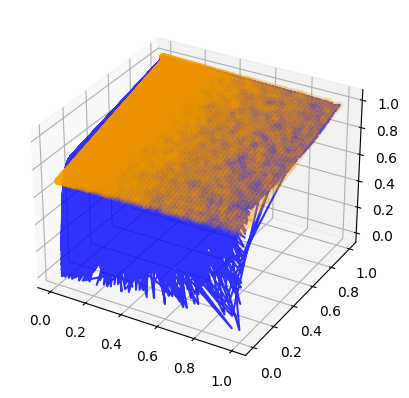

In [55]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(test_charge['current'], test_charge['SOC'], y_test_charge, label='true voltage', alpha=0.8, color = 'blue')
ax.scatter(test_charge['current'], test_charge['SOC'], y_predict_charge_1, label='predict voltage', alpha=0.05, color = 'orange')

#### Training and Testing model for Charging - 2

In [56]:
# linear regression with non-linear terms

x_train_charge = train_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_train_charge = train_charge['voltage']
x_test_charge = test_charge[['current', 'SOC', 'SS', 'Si', 'ii', 'SSS', 'SSi', 'Sii', 'iii', 'log_SOC']]
y_test_charge = test_charge['voltage']

# linear_regression_formula = ("voltage ~ current + SOC + SS + Si + ii + SSS + SSi + Sii + iii + log_SOC")
linear_regression_formula = ("voltage ~ SOC + SS + SSS + SSi + Sii + iii + log_SOC + 0")

charge_linear_model = smf.ols(formula=linear_regression_formula, data=train_charge).fit()
# charge_linear_model.rsquared
# charge_linear_model.summary()

y_predict_charge_2 = charge_linear_model.predict(x_test_charge)

linear_model_mse = mean_squared_error(y_test_charge, y_predict_charge_2)
linear_model_mse

0.0033440843834862417

In [57]:
mean_absolute_error(y_test_charge, y_predict_charge_2)

0.033029135984185706

In [58]:
max_error(y_test_charge, y_predict_charge_2)

0.4959602175508452

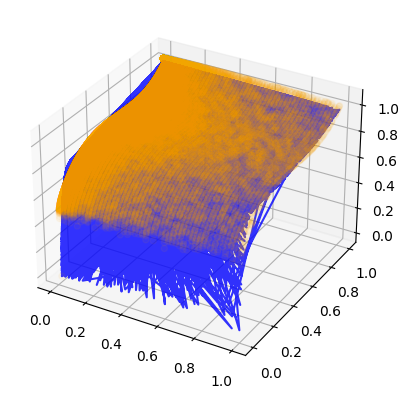

In [59]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(test_charge['current'], test_charge['SOC'], y_test_charge, label='true voltage', alpha=0.8, color = 'blue')
ax.scatter(test_charge['current'], test_charge['SOC'], y_predict_charge_2, label='predict voltage', alpha=0.05, color = 'orange')

In [60]:
charge_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                voltage   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.848e+06
Date:                Sat, 29 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:41:02   Log-Likelihood:                      1.2676e+05
No. Observations:               88369   AIC:                                 -2.535e+05
Df Residuals:                   88362   BIC:                                 -2.534e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SOC            1.6377      0.007    231.271      0.000       1.624       1.652
SS            -3.1214      0.016   -198.726      0.000      -3.152      -3.091
SSS            1.8921      0.010    191.924      0.000       1.873       1.911
SSi            0.1005      0.005     20.116      0.000       0.091       0.110
Sii           -0.1057      0.007    -14.973      0.000      -0.120      -0.092
iii            0.0382      0.003     14.786      0.000       0.033       0.043
log_SOC        0.6142      0.001    673.721      0.000       0.612       0.616
==============================================================================
Omnibus:                    66559.204   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1948602.418
Skew:                          -3.363   Prob(JB):                         0.00
Kurtosis:                      25.000   Cond. No.                         127.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### FNN for charging - 3
Note that current drops near the end of each charging process.

So, current is not constant during a charging process, not like discharge.

In [61]:
df_pack_update

,voltage,current,capacity,SOC,power
516,259.348316,-0.48,8.171241e-14,3.810940e-16,-124.487192
517,259.576177,-0.48,8.000000e-03,3.731075e-05,-124.596565
518,259.707414,-0.48,1.600000e-02,7.462150e-05,-124.659559
519,259.827797,-0.48,2.400000e-02,1.119323e-04,-124.717343
520,259.944606,-0.48,3.200000e-02,1.492430e-04,-124.773411
...,...,...,...,...,...
251015,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251016,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251017,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251018,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000


In [62]:
any(df_pack_update['power'] < 0)

True

In [63]:
df_pack_update.index[df_pack_update['current'] == 0][0]

27395

In [64]:
df_pack_update.loc[df_pack_update.index[df_pack_update['current'] < 0][0]:]

,voltage,current,capacity,SOC,power
516,259.348316,-0.48,8.171241e-14,3.810940e-16,-124.487192
517,259.576177,-0.48,8.000000e-03,3.731075e-05,-124.596565
518,259.707414,-0.48,1.600000e-02,7.462150e-05,-124.659559
519,259.827797,-0.48,2.400000e-02,1.119323e-04,-124.717343
520,259.944606,-0.48,3.200000e-02,1.492430e-04,-124.773411
...,...,...,...,...,...
251015,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251016,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251017,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000
251018,259.287428,0.00,1.081043e-01,5.041815e-04,0.000000


In [65]:
df_pack_update.loc[:df_pack_update.index[df_pack_update['current'] == 0][0]-1]

,voltage,current,capacity,SOC,power
516,259.348316,-0.480000,8.171241e-14,3.810940e-16,-124.487192
517,259.576177,-0.480000,8.000000e-03,3.731075e-05,-124.596565
518,259.707414,-0.480000,1.600000e-02,7.462150e-05,-124.659559
519,259.827797,-0.480000,2.400000e-02,1.119323e-04,-124.717343
520,259.944606,-0.480000,3.200000e-02,1.492430e-04,-124.773411
...,...,...,...,...,...
27390,374.400000,-0.000613,2.144109e+02,9.999788e-01,-0.229508
27391,374.400000,-0.000565,2.144109e+02,9.999788e-01,-0.211546
27392,374.400000,-0.000524,2.144109e+02,9.999789e-01,-0.196153
27393,374.400000,-0.000483,2.144109e+02,9.999789e-01,-0.180889


In [66]:
df_pack_cut = df_pack_update.copy()

# df_charge_orig['current'].nunique() != 50
# so
# use df_dis_charge_orig['current'].nunique() instead, this is equal to 50
current_array = np.zeros((df_dis_charge_orig['current'].nunique(), 501))
voltage_array = np.zeros((df_dis_charge_orig['current'].nunique(), 501))
SOC_array = np.zeros((df_dis_charge_orig['current'].nunique(), 501))

current_id = 0
SOC_new = np.linspace(0.001, 0.999, 501)

# take 501 points of voltage for each current by interpolating 100% SOC evenly

while any(df_pack_cut['power'] < 0):
    
    # cut from the first negative power to the end of dataframe
    df_pack_cut = df_pack_cut.loc[df_pack_cut.index[df_pack_cut['power'] < 0][0]:].copy()
    
    # the the first session that power is negative
    first_0_power_index = df_pack_cut.index[df_pack_cut['current'] == 0][0]
    df_charge_session = df_pack_cut.loc[:first_0_power_index-1].copy()
    
    # drop this charge session above
    df_pack_cut = df_pack_cut.loc[first_0_power_index:]
    
    
    # do interpolation for voltage
    f_v = interp1d(df_charge_session['SOC'], df_charge_session['voltage'])
    v_new = f_v(SOC_new)
    
    voltage_array[current_id,:] = v_new
    
    # do interpolation for voltage
    f_i = interp1d(df_charge_session['SOC'], df_charge_session['current'])
    i_new = - f_i(SOC_new)
    current_array[current_id,:] = i_new
    
    SOC_array[current_id,:] = SOC_new
    current_id += 1

In [67]:
current_array

array([[ 0.48      ,  0.48      ,  0.48      , ...,  0.48      ,
         0.48      ,  0.48      ],
       [ 0.96      ,  0.96      ,  0.96      , ...,  0.96      ,
         0.96      ,  0.96      ],
       [ 1.44      ,  1.44      ,  1.44      , ...,  1.44      ,
         1.44      ,  1.07321033],
       ...,
       [23.04      , 23.04      , 23.04      , ...,  5.7229416 ,
         3.67207948,  1.563708  ],
       [23.52      , 23.52      , 23.52      , ...,  5.73805429,
         3.68722864,  1.579407  ],
       [24.        , 24.        , 24.        , ...,  5.75348165,
         3.70282528,  1.59548402]])

In [68]:
voltage_array

array([[262.56721355, 268.50276819, 274.13834873, ..., 374.12998846,
        374.24547194, 374.36623211],
       [262.74237595, 268.67169816, 274.30113063, ..., 374.15650426,
        374.27218607, 374.39317065],
       [262.91513633, 268.83834547, 274.46172788, ..., 374.1829861 ,
        374.2988677 , 374.40000002],
       ...,
       [265.68453298, 274.8612125 , 280.69544874, ..., 374.40000042,
        374.40000042, 374.40000036],
       [265.48530707, 274.93162631, 280.79557311, ..., 374.4       ,
        374.4000005 , 374.40000032],
       [265.28580808, 275.00146826, 280.89713311, ..., 374.39999999,
        374.40000057, 374.40000031]])

In [69]:
SOC_array

array([[0.001   , 0.002996, 0.004992, ..., 0.995008, 0.997004, 0.999   ],
       [0.001   , 0.002996, 0.004992, ..., 0.995008, 0.997004, 0.999   ],
       [0.001   , 0.002996, 0.004992, ..., 0.995008, 0.997004, 0.999   ],
       ...,
       [0.001   , 0.002996, 0.004992, ..., 0.995008, 0.997004, 0.999   ],
       [0.001   , 0.002996, 0.004992, ..., 0.995008, 0.997004, 0.999   ],
       [0.001   , 0.002996, 0.004992, ..., 0.995008, 0.997004, 0.999   ]])

In [70]:
SOC_array.shape

(50, 501)

In [71]:
nn_input = np.ravel(voltage_array[:,:-1])
nn_output = np.ravel(voltage_array[:,1:])

In [72]:
single_feature_normalizer = tf.keras.layers.Normalization(axis=None)
feature = tf.random.normal((314, 1))
single_feature_normalizer.adapt(feature)

FNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    single_feature_normalizer,
    tf.keras.layers.Dense(1)
])

#add model layers

FNN.add(Dense(1, activation=purelin))
FNN.add(Dense(20, activation = 'relu'))
FNN.add(Dense(8, activation = 'sigmoid'))
FNN.add(Dense(5, activation = 'relu'))
FNN.add(Dense(1, activation=purelin))
sgd_optimizer = SGD(momentum=0.9)
FNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
historyFNN = FNN.fit(nn_input, nn_output, batch_size=30, epochs=30)

Epoch 1/30
834/834 [==============================] - 4s 3ms/step - loss: 103175.9688 - accuracy: 0.0000e+00
Epoch 2/30
834/834 [==============================] - 2s 3ms/step - loss: 41642.6641 - accuracy: 0.0000e+00
Epoch 3/30
834/834 [==============================] - 2s 3ms/step - loss: 5893.4536 - accuracy: 0.0000e+00
Epoch 4/30
834/834 [==============================] - 2s 3ms/step - loss: 298.0650 - accuracy: 0.0000e+00
Epoch 5/30
834/834 [==============================] - 2s 3ms/step - loss: 155.5206 - accuracy: 0.0000e+00
Epoch 6/30
834/834 [==============================] - 3s 3ms/step - loss: 155.2446 - accuracy: 0.0000e+00
Epoch 7/30
834/834 [==============================] - 2s 3ms/step - loss: 133.8188 - accuracy: 0.0000e+00
Epoch 8/30
834/834 [==============================] - 2s 3ms/step - loss: 98.5353 - accuracy: 0.0000e+00
Epoch 9/30
834/834 [==============================] - 2s 3ms/step - loss: 56.9729 - accuracy: 0.0000e+00
Epoch 10/30
834/834 [=====================

#### one-step prediction

In [73]:
testPredictFNN = FNN.predict(nn_input)

782/782 [==============================] - 2s 2ms/step


In [74]:
testPredictFNN_reshape = testPredictFNN.reshape(voltage_array.shape[0], (voltage_array.shape[1]-1))
testPredictFNN_reshape.shape

(50, 500)

In [75]:
# voltage_array[:,1:]

In [76]:
# testPredictFNN_reshape

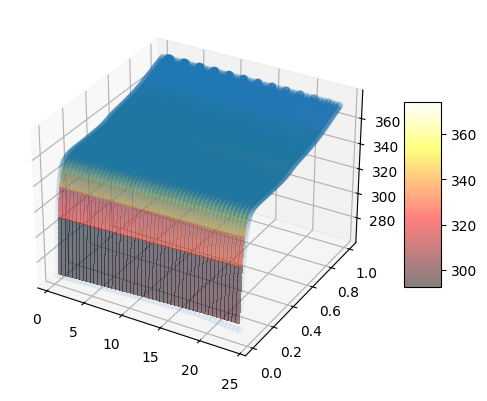

In [77]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(current_array[:,1:], SOC_array[:,1:], testPredictFNN_reshape, alpha=0.05)
surf = ax.plot_surface(current_array[:,1:], SOC_array[:,1:], voltage_array[:,1:], cmap=cm.hot, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

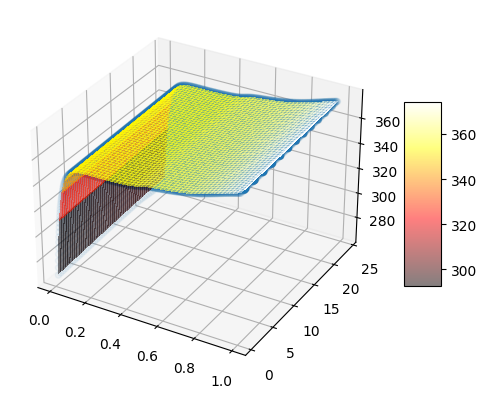

In [78]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(SOC_array[:,1:], current_array[:,1:], testPredictFNN_reshape, alpha=0.05)
surf = ax.plot_surface(SOC_array[:,1:], current_array[:,1:], voltage_array[:,1:], cmap=cm.hot, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### recursive call prediction

In [79]:
#for loop predict
# voltage_array.shape[0] == df_charge_orig['current'].nunique()
testPredictFNN2 = np.zeros((voltage_array.shape[0], voltage_array.shape[1]-1))
v0 = voltage_array[:,0]
for i in range(voltage_array.shape[1]-1):
    y = FNN.predict(v0)
    testPredictFNN2[:,i] = np.squeeze(y[:,:])
    v0 = y


2/2 [==============================] - 0s 6ms/step


2/2 [==============================] - 0s 6ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step


In [80]:
testPredictFNN2

array([[267.17852783, 271.95123291, 276.84811401, ..., 357.00747681,
        357.00747681, 357.00747681],
       [267.36047363, 272.13870239, 277.03952026, ..., 357.00747681,
        357.00747681, 357.00747681],
       [267.53988647, 272.3236084 , 277.22821045, ..., 357.00747681,
        357.00747681, 357.00747681],
       ...,
       [270.40911865, 275.27099609, 280.22555542, ..., 357.00747681,
        357.00747681, 357.00747681],
       [270.20315552, 275.05996704, 280.01159668, ..., 357.00747681,
        357.00747681, 357.00747681],
       [269.99685669, 274.84854126, 279.79714966, ..., 357.00747681,
        357.00747681, 357.00747681]])

In [81]:
testPredictFNN2_reshape = testPredictFNN2.reshape(voltage_array.shape[0], (voltage_array.shape[1]-1))
testPredictFNN2_reshape.shape

(50, 500)

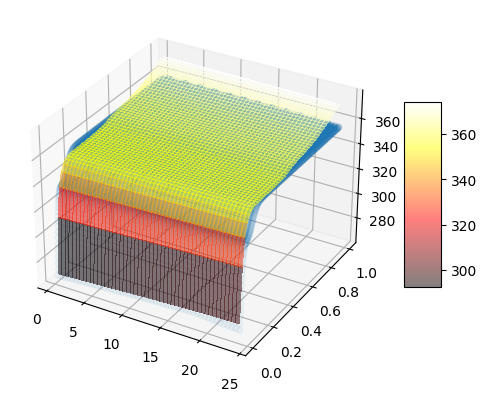

In [82]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(current_array[:,1:], SOC_array[:,1:], testPredictFNN2_reshape, alpha=0.05)
surf = ax.plot_surface(current_array[:,1:], SOC_array[:,1:], voltage_array[:,1:], cmap=cm.hot, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Calculation of R2 for discharge

In [83]:
voltage_array_y = voltage_array[:,1:]
voltage_array_y.shape

(50, 500)

In [84]:
voltage_1d_array = voltage_array_y.reshape((voltage_array_y.shape[0]*voltage_array_y.shape[1]))
voltage_1d_array

array([268.50276819, 274.13834873, 279.47701898, ..., 374.39999999,
       374.40000057, 374.40000031])

In [85]:
# one-step

testPredictFNN_1d_array = testPredictFNN_reshape.reshape((voltage_array_y.shape[0]*voltage_array_y.shape[1]))
testPredictFNN_1d_array

array([267.17853, 273.3145 , 279.07605, ..., 374.22336, 374.22333,
       374.22333], dtype=float32)

In [86]:
1 - (np.square(voltage_1d_array - testPredictFNN_1d_array)).sum() / (np.square(voltage_1d_array - voltage_1d_array.mean())).sum()

0.9996872816328222

In [87]:
# recursive

testPredictFNN2_1d_array = testPredictFNN2.reshape((voltage_array_y.shape[0]*voltage_array_y.shape[1]))
testPredictFNN2_1d_array

array([267.17852783, 271.95123291, 276.84811401, ..., 357.00747681,
       357.00747681, 357.00747681])

In [88]:
1 - (np.square(voltage_1d_array - testPredictFNN2_1d_array)).sum() / (np.square(voltage_1d_array - voltage_1d_array.mean())).sum()

0.6453444808431137